<a href="https://colab.research.google.com/github/karthikb4232/DEEP-LEARNING-CSA4705/blob/main/P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

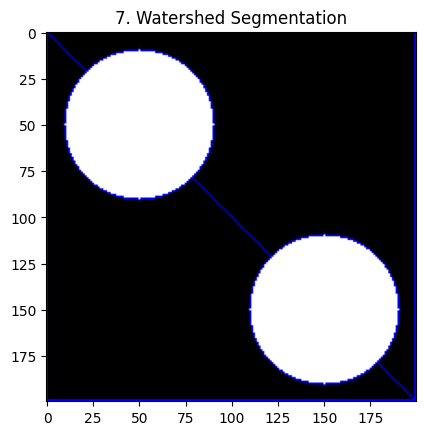

In [9]:
img = np.zeros((200,200,3), np.uint8)
cv2.circle(img,(50,50),40,(255,255,255),-1)
cv2.circle(img,(150,150),40,(255,255,255),-1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist,0.7*dist.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("7. Watershed Segmentation")
plt.show()